In [8]:
!pip install numpy==1.26.4 pandas==2.1.4 seaborn==0.13.2 scikit-learn==1.3.2 matplotlib==3.8.0



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error

In [10]:
# Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\kkais\\OneDrive\\Documents\\Desktop\\IOT\\Housing.csv")  # Make sure this CSV is in the same folder
print("Dataset Loaded")
print(df.head())


Dataset Loaded
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

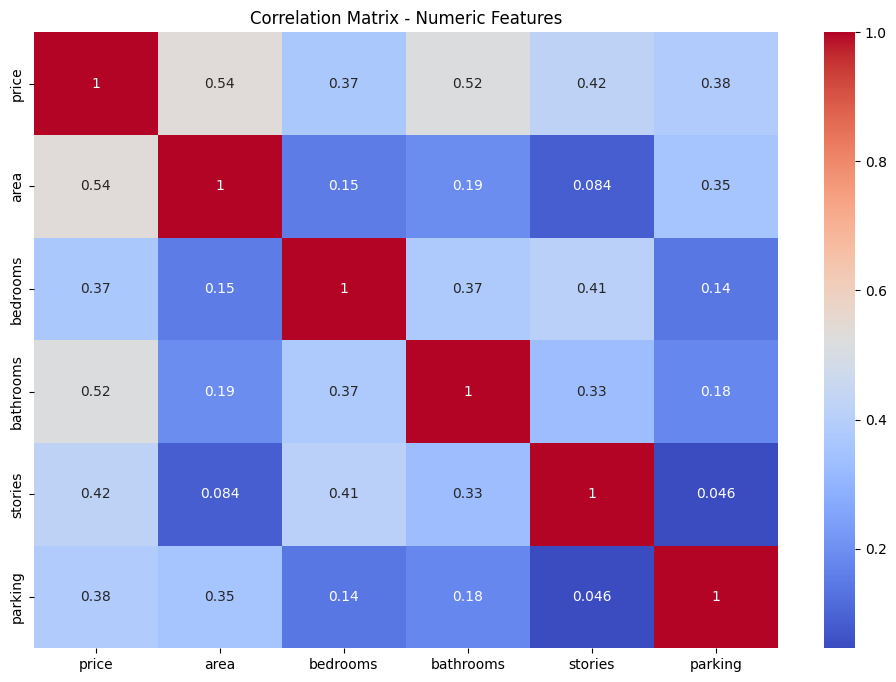

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Numeric Features")
plt.show()

In [15]:
X = df.drop(columns=['price'])
y = df['price']

In [16]:
cat_cols = ['mainroad','guestroom','basement','hotwaterheating',
            'airconditioning','prefarea','furnishingstatus','stories']
num_cols = [c for c in X.columns if c not in cat_cols]


In [17]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')  # numerical features pass through

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
# 6. Build pipeline with preprocessing + model
model = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])

In [20]:
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus',
                                                   'stories'])])),
                ('lr', LinearRegression())])

In [21]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [22]:
print("\n📊 Model Performance:")
print(f"R² Score : {r2:.3f}")
print(f"MSE      : {mse:.2f}")
print(f"RMSE     : {rmse:.2f}")
print(f"MAE      : {mae:.2f}")


📊 Model Performance:
R² Score : 0.645
MSE      : 1793256055928.74
RMSE     : 1339125.11
MAE      : 971468.46


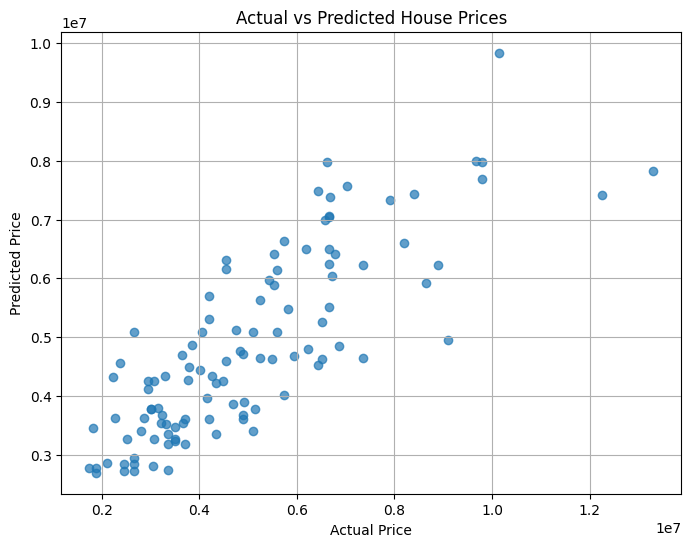

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [31]:
new = pd.DataFrame({
    'area':[5000],
    'bedrooms':[2],
    'bathrooms':[3],
    'stories':[2],
    'mainroad':['yes'],
    'guestroom':['no'],
    'basement':['yes'],
    'hotwaterheating':['no'],
    'airconditioning':['yes'],
    'parking':[2],
    'prefarea':['yes'],
    
    'furnishingstatus':['semi-furnished']
})


In [32]:
new

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5000,2,3,2,yes,no,yes,no,yes,2,yes,semi-furnished


In [33]:
pred_price = model.predict(new)
print(f"\nPredicted Price for the New House: ₹{int(pred_price[0])}")


Predicted Price for the New House: ₹7979752


In [34]:
import pickle

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved as 'house_price_model.pkl'")

✅ Model saved as 'house_price_model.pkl'
